# Predicting computer prices using multiple linear regression and decision trees

Author: Yu Chen

Course Project, UC Irvine, Math 10, S24

I would like to post my notebook on the course’s website. [Yes]

# Introduction

In this project, I will analyze the impact of different hardware of different laptops on the price, and which parameters have the greatest impact on the price.In kaggle (https://www.kaggle.com/datasets/jacksondivakarr/laptop-price-prediction-dataset)I found a dataset with information about more than 800 models of computers, including price, Ram, Rom, screen size, CPU, etc.

The goal of this project is to predict the price of a certain type of computer after knowing its hardware information, which may serve as a price reference for shoppers who don’t know much about laptops.

# Importing 

In [1]:
import pandas as pd
import altair as alt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
warnings.filterwarnings("ignore")

# Basic information about the data and Visualization

In [2]:
data=pd.read_csv('LaptopPricePredictionDataset.csv')
data.head()

Unnamed: 0.1  Unnamed: 0   brand                                  name  \
0             0           0      HP      Victus 15-fb0157AX Gaming Laptop   
1             1           1      HP                   15s-fq5007TU Laptop   
2             2           2    Acer                  One 14 Z8-415 Laptop   
3             3           3  Lenovo  Yoga Slim 6 14IAP8 82WU0095IN Laptop   
4             4           4   Apple       MacBook Air 2020 MGND3HN Laptop   

   price  spec_rating                      processor  \
0  49900    73.000000      5th Gen AMD Ryzen 5 5600H   
1  39900    60.000000   12th Gen Intel Core i3 1215U   
2  26990    69.323529  11th Gen Intel Core i3 1115G4   
3  59729    66.000000   12th Gen Intel Core i5 1240P   
4  69990    69.323529                       Apple M1   

                              CPU   Ram Ram_type    ROM ROM_type  \
0           Hexa Core, 12 Threads   8GB     DDR4  512GB      SSD   
1  Hexa Core (2P + 4E), 8 Threads   8GB     DDR4  512GB      SSD   
2            Dual Core, 4 Threads   8GB     DDR4  512GB      SSD   
3  12 Cores (4P + 8E), 16 Threads  16GB   LPDDR5  512GB      SSD   
4             Octa Core (4P + 4E)   8GB     DDR4  256GB      SSD   

                            GPU  display_size  resolution_width  \
0       4GB AMD Radeon RX 6500M          15.6            1920.0   
1            Intel UHD Graphics          15.6            1920.0   
2        Intel Iris Xe Graphics          14.0            1920.0   
3      Intel Integrated Iris Xe          14.0            2240.0   
4  Apple M1 Integrated Graphics          13.3            2560.0   

   resolution_height             OS  warranty  
0             1080.0  Windows 11 OS         1  
1             1080.0  Windows 11 OS         1  
2             1080.0  Windows 11 OS         1  
3             1400.0  Windows 11 OS         1  
4             1600.0         Mac OS         1

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

There are no missing values in the data set and no data needs to be deleted.

In [4]:
data.describe().round(2)

Unnamed: 0.1  Unnamed: 0      price  spec_rating  display_size  \
count        893.00      893.00     893.00       893.00        893.00   
mean         467.14      521.38   79907.41        69.38         15.17   
std          270.21      299.92   60880.04         5.54          0.94   
min            0.00        0.00    9999.00        60.00         11.60   
25%          235.00      265.00   44500.00        66.00         14.00   
50%          467.00      531.00   61990.00        69.32         15.60   
75%          702.00      784.00   90990.00        71.00         15.60   
max          930.00     1019.00  450039.00        89.00         18.00   

       resolution_width  resolution_height  warranty  
count            893.00             893.00    893.00  
mean            2035.39            1218.32      1.08  
std              426.08             326.76      0.33  
min             1080.00             768.00      0.00  
25%             1920.00            1080.00      1.00  
50%             1920.00            1080.00      1.00  
75%             1920.00            1200.00      1.00  
max             3840.00            3456.00      3.00

In [5]:
#Defined a function to draw bar
def draw_bar(df, title):
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(df.index, df.values)
    ax.set_title(title)
    for i,j in enumerate(df.values):
        ax.text(i,j+2,j,va='bottom',ha='center')
    plt.xticks(rotation=60)
    plt.show()

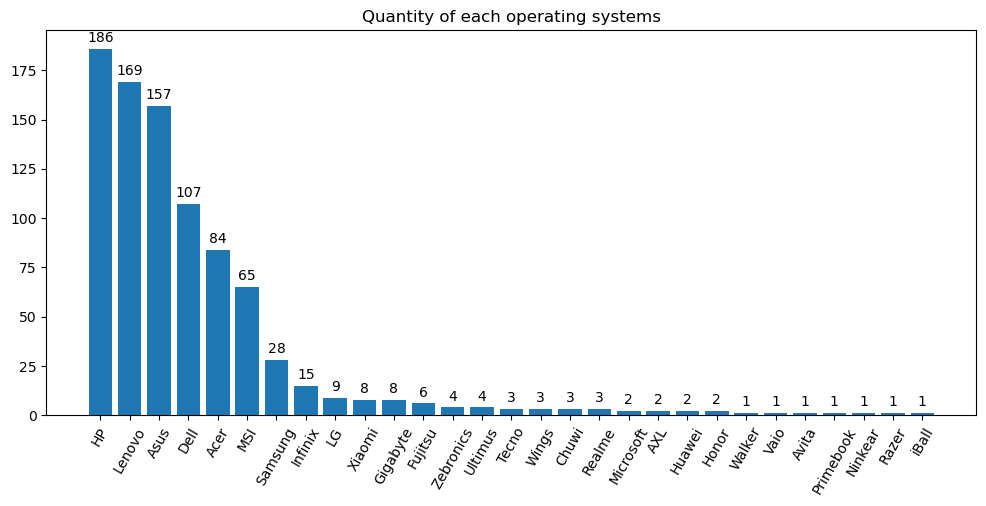

In [6]:
#Apple computers have fixed prices and different operating systems, so Apple computer data is removed here
data=data[~data['brand'].str.contains('Apple')]
df_count = data['brand'].value_counts()
draw_bar(df_count, 'Quantity of each operating systems')

Popular brands include HP, Lenovo, and Asus

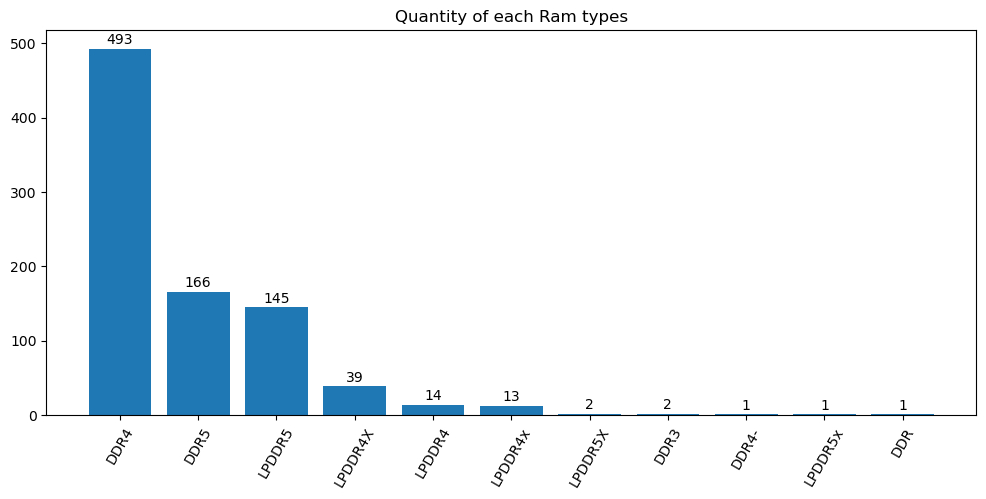

In [7]:
df_count = data['Ram_type'].value_counts()
draw_bar(df_count, 'Quantity of each Ram types')

The mainstream memory type is DDR4

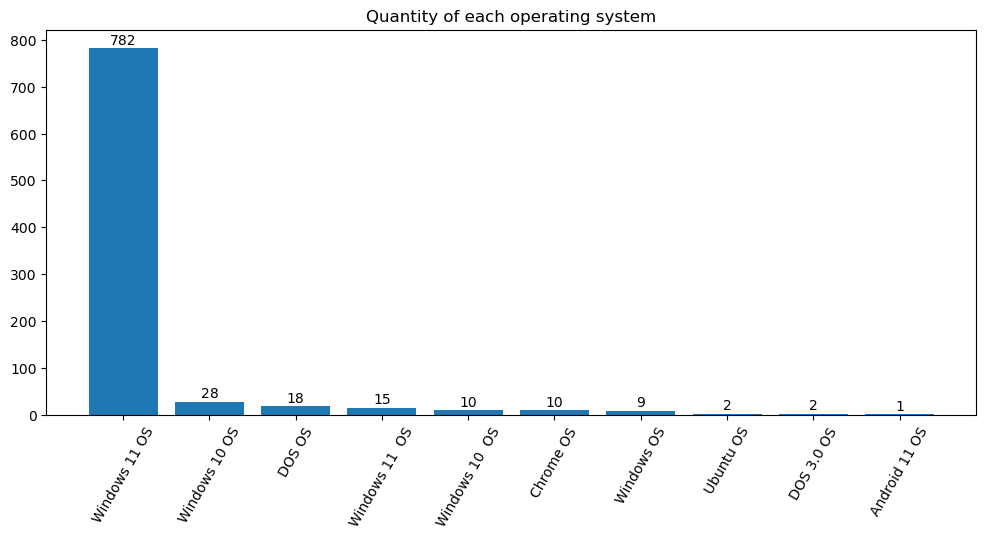

In [8]:
df_system = data['OS'].value_counts()
draw_bar(df_system,'Quantity of each operating system')

# Optimize data

Convert some data into numbers for analysis. In this step, I optimize the data into a type that is easier to analyze. For example, 1TB needs to be converted into 1024GB before analysis. And most of the CPU model data contains text, and the number of cores and threads needs to be extracted.

In [9]:
data['Ram']=data['Ram'].astype(str).apply(lambda r:int( r.replace("GB","").replace("TB","") ))
data['ROM']=data['ROM'].astype(str).apply(lambda r:int( r.replace("GB","").replace("TB","") ))
data['ROM']=data['ROM'].apply(lambda r: r*1024 if r < 10 else r)

def getThreads(cpu):
        l=0
        if len(cpu.split(","))>1:
            l=cpu.split(",")[-1].replace("Threads","")
        return int(l)
def getCores(cpu):
    cpu = cpu.strip()
    l=cpu.split(",")[0].split(" ")[0]
    try:
        return int(l)
    except:
        if "hexa" in l.lower():
            return 6
        elif "octa" in l.lower():
            return 8
        elif "dual" in l.lower():
            return 2
        elif "quad" in l.lower():
            return 4
        return 0
    
data['Thread']=data['CPU'].apply(getThreads)
data['Cores']=data['CPU'].apply(getCores)

data.drop('Unnamed: 0.1',axis = 1,inplace = True)
data.drop('Unnamed: 0',axis = 1,inplace = True)

In [10]:
data.head()

brand                                  name  price  spec_rating  \
0      HP      Victus 15-fb0157AX Gaming Laptop  49900    73.000000   
1      HP                   15s-fq5007TU Laptop  39900    60.000000   
2    Acer                  One 14 Z8-415 Laptop  26990    69.323529   
3  Lenovo  Yoga Slim 6 14IAP8 82WU0095IN Laptop  59729    66.000000   
5    Acer               Extensa EX214-53 Laptop  39990    62.000000   

                       processor                             CPU  Ram  \
0      5th Gen AMD Ryzen 5 5600H           Hexa Core, 12 Threads    8   
1   12th Gen Intel Core i3 1215U  Hexa Core (2P + 4E), 8 Threads    8   
2  11th Gen Intel Core i3 1115G4            Dual Core, 4 Threads    8   
3   12th Gen Intel Core i5 1240P  12 Cores (4P + 8E), 16 Threads   16   
5   12th Gen Intel Core i5 1240P  12 Cores (4P + 8E), 16 Threads    8   

  Ram_type  ROM ROM_type                       GPU  display_size  \
0     DDR4  512      SSD   4GB AMD Radeon RX 6500M          15.6   
1     DDR4  512      SSD        Intel UHD Graphics          15.6   
2     DDR4  512      SSD    Intel Iris Xe Graphics          14.0   
3   LPDDR5  512      SSD  Intel Integrated Iris Xe          14.0   
5     DDR4  512      SSD    Intel Iris Xe Graphics          14.0   

   resolution_width  resolution_height             OS  warranty  Thread  Cores  
0            1920.0             1080.0  Windows 11 OS         1      12      6  
1            1920.0             1080.0  Windows 11 OS         1       8      6  
2            1920.0             1080.0  Windows 11 OS         1       4      2  
3            2240.0             1400.0  Windows 11 OS         1      16     12  
5            1920.0             1080.0  Windows 11 OS         1      16     12

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 877 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              877 non-null    object 
 1   name               877 non-null    object 
 2   price              877 non-null    int64  
 3   spec_rating        877 non-null    float64
 4   processor          877 non-null    object 
 5   CPU                877 non-null    object 
 6   Ram                877 non-null    int64  
 7   Ram_type           877 non-null    object 
 8   ROM                877 non-null    int64  
 9   ROM_type           877 non-null    object 
 10  GPU                877 non-null    object 
 11  display_size       877 non-null    float64
 12  resolution_width   877 non-null    float64
 13  resolution_height  877 non-null    float64
 14  OS                 877 non-null    object 
 15  warranty           877 non-null    int64  
 16  Thread             877 non-null

# correlation test

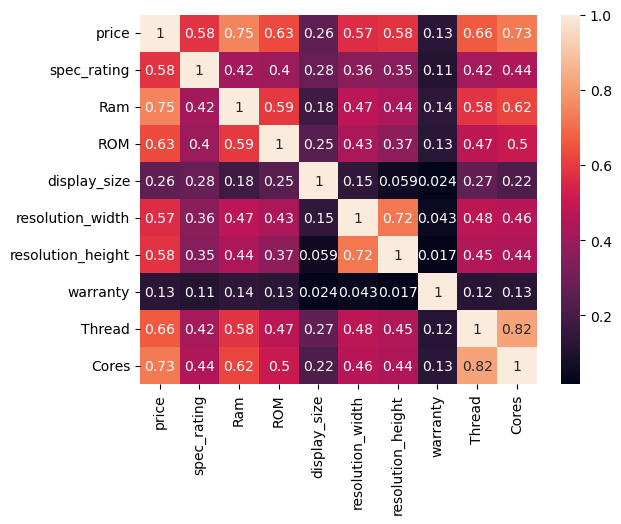

In [12]:
numColForCoef=data.select_dtypes(exclude=["object"])
plot=sb.heatmap(numColForCoef.corr(),annot=True)
plt.show()

It can be seen that the price is strongly correlated with Cores, Thread, resolution, ROM, RAM, and spec rating.

In [13]:
TrainingSet = data.drop(columns=['warranty','display_size'])

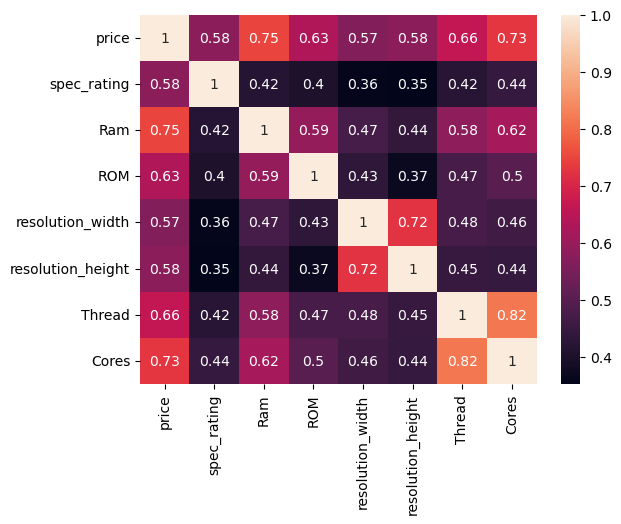

In [14]:
numColForCoef=TrainingSet.select_dtypes(exclude=["object"])
plot=sb.heatmap(numColForCoef.corr(),annot=True)
plt.show()

After this step is completed, we have obtained several highly correlated variables,

In [15]:
TrainingSet['price'].skew()

2.865017269749211

In [16]:
TrainingSet['price_ln'] = np.log(TrainingSet['price'])
TrainingSet['price_ln'].skew()

0.4124667391274515

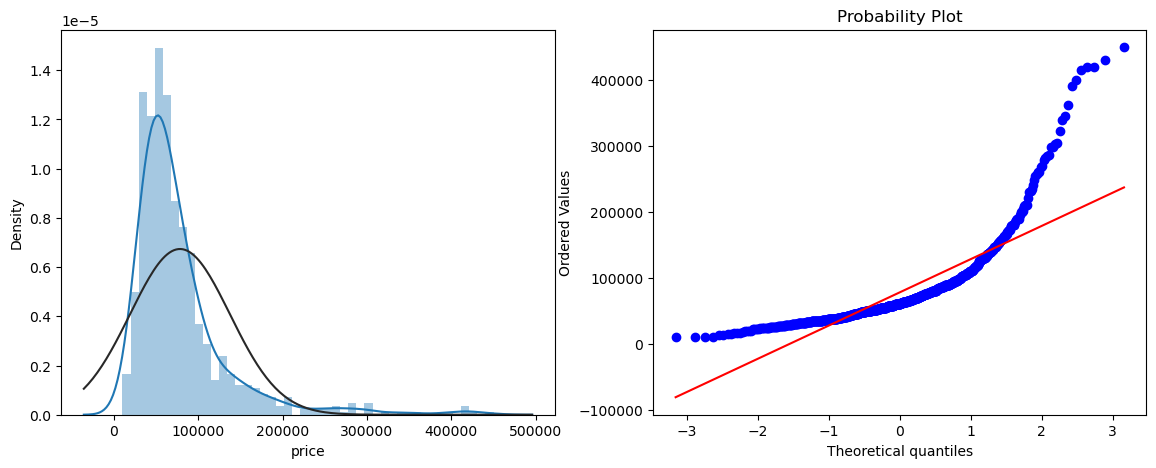

In [17]:
from scipy import stats
from scipy.stats import norm, skew 

def norm_test(data):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    sns.distplot(data, fit=norm, ax=ax[0])
    stats.probplot(data, plot=ax[1])
    plt.show()

norm_test(TrainingSet.price)


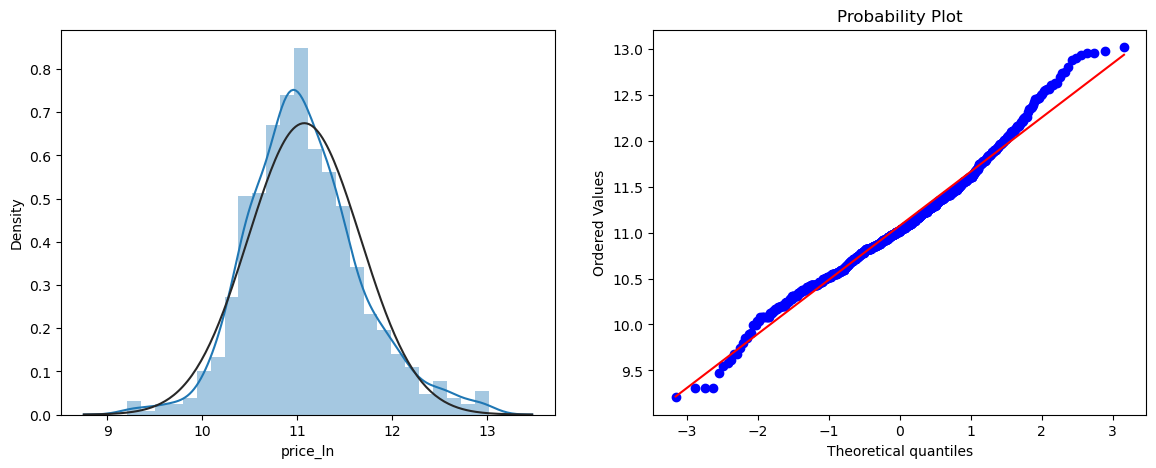

In [18]:
norm_test(TrainingSet.price_ln)

After logarithmic transformation, the data is closer to a normal distribution

# Machine Learning

In this step, I will use linear regression and decision trees to analyze the variables.

In [19]:
features = ['spec_rating','Ram','ROM','resolution_width','resolution_height','Thread','Cores']
X = TrainingSet[features]
y = TrainingSet['price_ln']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [20]:
reg=LinearRegression()
reg.fit(X_train, y_train)
print('Train Score: ' + str(reg.score(X_train, y_train)))
print('Test Score: ' + str(reg.score(X_test, y_test)))
print('Score: ' + str(reg.score(TrainingSet[features], TrainingSet['price_ln'])))

Train Score: 0.7882271170948115
Test Score: 0.7612986644120081
Score: 0.7680228504845487


Here I got the prediction data of price from linear regression

In [21]:
TrainingSet['Pred_price'] = np.power(np.e,reg.predict(TrainingSet[features]))

Below I have tried different depths of the decision tree to achieve the maximum fit

In [22]:
DT = DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=6, max_features='sqrt',random_state=10)
DT.fit(X_train, y_train)
print('Train Score: ' + str(DT.score(X_train, y_train)))
print('Test Score: ' + str(DT.score(X_test, y_test)))
print('Score: ' + str(DT.score(TrainingSet[features], TrainingSet['price_ln'])))

Train Score: 0.8526644856850252
Test Score: 0.7197774115465023
Score: 0.7528334930481183


In [23]:
plt.figure(figsize=(200,100))
plot_tree(DT, feature_names=features, filled=True)
plt.show()

Here I got the prediction data of price from decision tree

In [24]:
TrainingSet['DT_Pred_price']=np.power(np.e,DT.predict(TrainingSet[features]))

In [25]:
TrainingSet['counter'] = range(len(TrainingSet))

In [26]:
P1 = alt.Chart(TrainingSet.head(100)).mark_circle(color = 'red').encode(
    y = 'price',
    x = 'counter'
).properties(
    width = 600,
    height = 300
)
P2 = alt.Chart(TrainingSet.head(100)).mark_circle(color = 'blue').encode(
    y = 'Pred_price',
    x = 'counter'
).properties(
    width = 600,
    height = 300
)
P3 = alt.Chart(TrainingSet.head(100)).mark_circle(color = 'green').encode(
    y = 'DT_Pred_price',
    x = 'counter'
).properties(
    width = 600,
    height = 300
)

Comparison of linear regression predictions and true values，

Red is the actual value, blue is the predicted value

In [27]:
P1+P2

alt.LayerChart(...)

Comparison of dicision tree predictions and true values，

Red is the actual value, green is the predicted value

In [28]:
P1+P3

alt.LayerChart(...)

# Summary

In this project, I analyzed the impact of different hardware on price. In the analysis, we learned that price has a strong correlation with hardware, and our predictions are relatively close to the real price.The most important factors are Ram, and threads. In fact, graphics cards also have a great impact on prices, but in this data set, it is difficult to analyze the graphics card factors, so there is a little inaccuracy in the prediction.

# References

Dataset: 
    https://www.kaggle.com/datasets/jacksondivakarr/laptop-price-prediction-dataset

Decision Tree Regression:
    https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html